# 📦 Logistik-Datenanalyse

Analyse der Datei `logistik_extended_200_orders_REALISTIC.csv`

## 1. Import der Bibliotheken

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Einstellungen für bessere Visualisierungen
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliotheken erfolgreich importiert")

✅ Bibliotheken erfolgreich importiert


## 2. Daten einlesen

In [ ]:
print("test2")

In [5]:
# CSV-Datei einlesen
df = pd.read_csv("../data/logistik_extended_200_orders_REALISTIC.csv")

print(f"✅ Daten erfolgreich eingelesen!")
print(f"📊 Anzahl der Zeilen: {len(df)}")
print(f"📊 Anzahl der Spalten: {len(df.columns)}")
print(f"\n🔍 Spalten: {', '.join(df.columns.tolist())}")

✅ Daten erfolgreich eingelesen!
📊 Anzahl der Zeilen: 200
📊 Anzahl der Spalten: 18

🔍 Spalten: order_id, sku, category, zone, distance_m, picker_id, priority, qty, we_start, we_end, in_start, in_end, kom_start, kom_end, pack_start, pack_end, ship_start, ship_end


## 3. Erste Übersicht über die Daten

In [6]:
# Erste 5 Zeilen anzeigen
df.head()

,order_id,sku,category,zone,distance_m,picker_id,priority,qty,we_start,we_end,in_start,in_end,kom_start,kom_end,pack_start,pack_end,ship_start,ship_end
0,O1,SKU2824,A,D,38.021936,P01,Medium,5,2025-01-01 15:14:00,2025-01-01 15:20:08.499506,2025-01-01 15:20:08.499506,2025-01-01 15:26:57.144986,2025-01-01 15:26:57.144986,2025-01-01 15:39:28.087542,2025-01-01 15:39:28.087542,2025-01-01 15:46:41.859901,2025-01-01 15:46:41.859901,2025-01-01 15:52:04.762938
1,O2,SKU3286,B,A,44.191219,P12,Medium,6,2025-01-01 09:57:00,2025-01-01 10:00:28.489812,2025-01-01 10:00:28.489812,2025-01-01 10:06:19.924192,2025-01-01 10:06:19.924192,2025-01-01 10:20:58.736593,2025-01-01 10:20:58.736593,2025-01-01 10:24:58.736593,2025-01-01 10:24:58.736593,2025-01-01 10:32:24.269864
2,O3,SKU9935,A,C,67.220789,P02,Low,4,2025-01-01 10:01:00,2025-01-01 10:04:13.921410,2025-01-01 10:04:13.921410,2025-01-01 10:11:31.017162,2025-01-01 10:11:31.017162,2025-01-01 10:30:08.104503,2025-01-01 10:30:08.104503,2025-01-01 10:41:24.225215,2025-01-01 10:41:24.225215,2025-01-01 10:47:14.798116
3,O4,SKU2535,B,B,43.993613,P04,Low,1,2025-01-01 09:01:00,2025-01-01 09:04:42.498375,2025-01-01 09:04:42.498375,2025-01-01 09:10:30.293582,2025-01-01 09:10:30.293582,2025-01-01 09:25:57.665334,2025-01-01 09:25:57.665334,2025-01-01 09:34:56.045667,2025-01-01 09:34:56.045667,2025-01-01 09:39:20.851683
4,O5,SKU4257,A,D,52.088636,P12,Low,4,2025-01-01 14:26:00,2025-01-01 14:28:02.419793,2025-01-01 14:28:02.419793,2025-01-01 14:32:23.037467,2025-01-01 14:32:23.037467,2025-01-01 14:48:11.004305,2025-01-01 14:48:11.004305,2025-01-01 14:58:39.620295,2025-01-01 14:58:39.620295,2025-01-01 15:04:55.043440


In [7]:
# Datentypen und fehlende Werte prüfen
print("📋 Datentypen und Info:")
print("="*60)
df.info()
print("\n❓ Fehlende Werte:")
print("="*60)
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✅ Keine fehlenden Werte!")

📋 Datentypen und Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    200 non-null    object 
 1   sku         200 non-null    object 
 2   category    200 non-null    object 
 3   zone        200 non-null    object 
 4   distance_m  200 non-null    float64
 5   picker_id   200 non-null    object 
 6   priority    200 non-null    object 
 7   qty         200 non-null    int64  
 8   we_start    200 non-null    object 
 9   we_end      200 non-null    object 
 10  in_start    200 non-null    object 
 11  in_end      200 non-null    object 
 12  kom_start   200 non-null    object 
 13  kom_end     200 non-null    object 
 14  pack_start  200 non-null    object 
 15  pack_end    200 non-null    object 
 16  ship_start  200 non-null    object 
 17  ship_end    200 non-null    object 
dtypes: float64(1), int64(1), object(16)
memory usag

In [8]:
# Statistische Übersicht für numerische Spalten
print("📊 Statistische Kennzahlen:")
print("="*60)
df.describe()

📊 Statistische Kennzahlen:


,distance_m,qty
count,200.000000,200.000000
mean,54.312814,3.620000
std,12.962303,1.700015
min,15.191912,1.000000
25%,44.408999,2.000000
50%,53.484383,4.000000
75%,63.048083,5.000000
max,98.722963,6.000000


## 4. Zeitachsen-Analyse: Bestellungen pro Tag

In [10]:
# Alle Zeitstempel prüfen um zu sehen welche Spalte die beste Zeitverteilung hat
print("🔍 Prüfe verfügbare Zeitstempel-Spalten:\n")

time_columns = ['we_start', 'we_end', 'in_start', 'in_end', 'kom_start', 'kom_end', 
                'pack_start', 'pack_end', 'ship_start', 'ship_end']

for col in time_columns:
    df[f'{col}_dt'] = pd.to_datetime(df[col])
    unique_dates = df[f'{col}_dt'].dt.date.nunique()
    date_range = f"{df[f'{col}_dt'].min()} bis {df[f'{col}_dt'].max()}"
    print(f"  {col:15} → {unique_dates:3} verschiedene Tage | Range: {date_range}")

# Nutzen wir kom_start (Kommissionierung Start) für die Zeitachse
df['datetime'] = pd.to_datetime(df['kom_start'])
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

# Bestellungen pro Tag zählen
orders_per_day = df.groupby('date')['order_id'].nunique().reset_index()
orders_per_day.columns = ['Datum', 'Anzahl_Bestellungen']
orders_per_day['Datum'] = pd.to_datetime(orders_per_day['Datum'])

print(f"\n📅 Gewählter Zeitstempel: kom_start (Kommissionierung Beginn)")
print(f"📅 Zeitraum: {orders_per_day['Datum'].min().date()} bis {orders_per_day['Datum'].max().date()}")
print(f"📦 Gesamtanzahl Bestellungen: {orders_per_day['Anzahl_Bestellungen'].sum()}")
print(f"📊 Durchschnitt pro Tag: {orders_per_day['Anzahl_Bestellungen'].mean():.1f}")
print("\n📋 Bestellungen pro Tag:")
orders_per_day

🔍 Prüfe verfügbare Zeitstempel-Spalten:

  we_start        →   1 verschiedene Tage | Range: 2025-01-01 07:02:00 bis 2025-01-01 16:57:00
  we_end          →   1 verschiedene Tage | Range: 2025-01-01 07:05:29.601407 bis 2025-01-01 17:00:32.939698
  in_start        →   1 verschiedene Tage | Range: 2025-01-01 07:05:29.601407 bis 2025-01-01 17:00:32.939698
  in_end          →   1 verschiedene Tage | Range: 2025-01-01 07:09:52.407325 bis 2025-01-01 17:07:50.840969
  kom_start       →   1 verschiedene Tage | Range: 2025-01-01 07:09:52.407325 bis 2025-01-01 17:07:50.840969
  kom_end         →   1 verschiedene Tage | Range: 2025-01-01 07:22:58.228506 bis 2025-01-01 17:27:53.472887
  pack_start      →   1 verschiedene Tage | Range: 2025-01-01 07:22:58.228506 bis 2025-01-01 17:27:53.472887
  pack_end        →   1 verschiedene Tage | Range: 2025-01-01 07:30:13.250060 bis 2025-01-01 17:35:09.240024
  ship_start      →   1 verschiedene Tage | Range: 2025-01-01 07:30:13.250060 bis 2025-01-01 17:35:09

,Datum,Anzahl_Bestellungen
0,2025-01-01,200


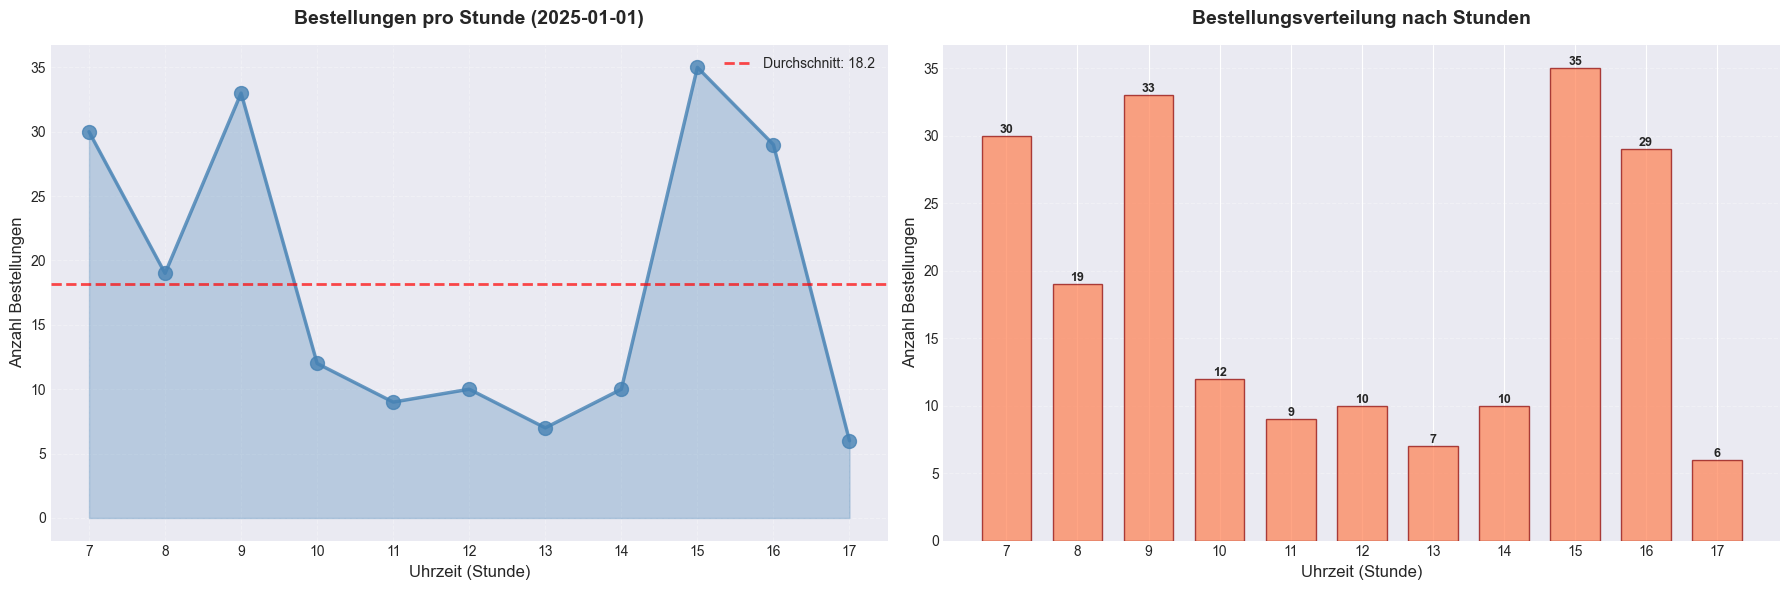


📊 Statistik der stündlichen Verteilung:
   Peak-Stunde: 15:00 Uhr mit 35 Bestellungen
   Ruhigste Stunde: 17:00 Uhr mit 6 Bestellungen
   Durchschnitt: 18.2 Bestellungen/Stunde


In [11]:
# Da alle Bestellungen am gleichen Tag sind, zeigen wir die Verteilung über den Tag (stündlich)
orders_per_hour = df.groupby('hour')['order_id'].nunique().reset_index()
orders_per_hour.columns = ['Stunde', 'Anzahl_Bestellungen']

# Visualisierung: Bestellungen pro Stunde
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Linienplot mit Stunden
ax1.plot(orders_per_hour['Stunde'], orders_per_hour['Anzahl_Bestellungen'], 
         marker='o', linewidth=2.5, markersize=10, color='steelblue', alpha=0.8)
ax1.fill_between(orders_per_hour['Stunde'], orders_per_hour['Anzahl_Bestellungen'], 
                 alpha=0.3, color='steelblue')
ax1.set_title('Bestellungen pro Stunde (2025-01-01)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Uhrzeit (Stunde)', fontsize=12)
ax1.set_ylabel('Anzahl Bestellungen', fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(range(int(orders_per_hour['Stunde'].min()), int(orders_per_hour['Stunde'].max())+1))

# Durchschnittslinie
avg_orders_hour = orders_per_hour['Anzahl_Bestellungen'].mean()
ax1.axhline(y=avg_orders_hour, color='red', linestyle='--', linewidth=2, 
            label=f'Durchschnitt: {avg_orders_hour:.1f}', alpha=0.7)
ax1.legend(fontsize=10)

# Plot 2: Balkendiagramm
bars = ax2.bar(orders_per_hour['Stunde'], orders_per_hour['Anzahl_Bestellungen'], 
               color='coral', edgecolor='darkred', alpha=0.7, width=0.7)
ax2.set_title('Bestellungsverteilung nach Stunden', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Uhrzeit (Stunde)', fontsize=12)
ax2.set_ylabel('Anzahl Bestellungen', fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_xticks(range(int(orders_per_hour['Stunde'].min()), int(orders_per_hour['Stunde'].max())+1))

# Werte auf Balken anzeigen
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistik ausgeben
print("\n📊 Statistik der stündlichen Verteilung:")
print(f"   Peak-Stunde: {orders_per_hour.loc[orders_per_hour['Anzahl_Bestellungen'].idxmax(), 'Stunde']:.0f}:00 Uhr mit {orders_per_hour['Anzahl_Bestellungen'].max()} Bestellungen")
print(f"   Ruhigste Stunde: {orders_per_hour.loc[orders_per_hour['Anzahl_Bestellungen'].idxmin(), 'Stunde']:.0f}:00 Uhr mit {orders_per_hour['Anzahl_Bestellungen'].min()} Bestellungen")
print(f"   Durchschnitt: {avg_orders_hour:.1f} Bestellungen/Stunde")

## 5. Hypothesentest: Ist die Kommissionierung der Bottleneck?

**Hypothese**: Die Kommissionierung ist der zeitintensivste Prozessschritt und verursacht den größten Engpass in der Logistikkette.

Um das zu testen, analysieren wir:
1. Die Durchlaufzeiten aller Prozessschritte im Vergleich
2. Die Verteilung der Bearbeitungszeiten
3. Wo die meiste Zeit verloren geht

In [12]:
# Berechnung der Durchlaufzeiten für jeden Prozessschritt
# Prozessschritte: Wareneingang (WE) → Einlagerung (IN) → Kommissionierung (KOM) → Verpackung (PACK) → Versand (SHIP)

# Zeitdifferenzen in Minuten berechnen
df['duration_wareneingang'] = (df['we_end_dt'] - df['we_start_dt']).dt.total_seconds() / 60
df['duration_einlagerung'] = (df['in_end_dt'] - df['in_start_dt']).dt.total_seconds() / 60
df['duration_kommissionierung'] = (df['kom_end_dt'] - df['kom_start_dt']).dt.total_seconds() / 60
df['duration_verpackung'] = (df['pack_end_dt'] - df['pack_start_dt']).dt.total_seconds() / 60
df['duration_versand'] = (df['ship_end_dt'] - df['ship_start_dt']).dt.total_seconds() / 60

# Gesamtdurchlaufzeit (Ende-zu-Ende)
df['duration_total'] = (df['ship_end_dt'] - df['we_start_dt']).dt.total_seconds() / 60

# Wartezeiten zwischen den Schritten
df['wait_we_to_in'] = (df['in_start_dt'] - df['we_end_dt']).dt.total_seconds() / 60
df['wait_in_to_kom'] = (df['kom_start_dt'] - df['in_end_dt']).dt.total_seconds() / 60
df['wait_kom_to_pack'] = (df['pack_start_dt'] - df['kom_end_dt']).dt.total_seconds() / 60
df['wait_pack_to_ship'] = (df['ship_start_dt'] - df['pack_end_dt']).dt.total_seconds() / 60

# Statistik erstellen
process_stats = pd.DataFrame({
    'Prozessschritt': ['Wareneingang', 'Einlagerung', 'Kommissionierung', 'Verpackung', 'Versand'],
    'Durchschnitt (min)': [
        df['duration_wareneingang'].mean(),
        df['duration_einlagerung'].mean(),
        df['duration_kommissionierung'].mean(),
        df['duration_verpackung'].mean(),
        df['duration_versand'].mean()
    ],
    'Median (min)': [
        df['duration_wareneingang'].median(),
        df['duration_einlagerung'].median(),
        df['duration_kommissionierung'].median(),
        df['duration_verpackung'].median(),
        df['duration_versand'].median()
    ],
    'Max (min)': [
        df['duration_wareneingang'].max(),
        df['duration_einlagerung'].max(),
        df['duration_kommissionierung'].max(),
        df['duration_verpackung'].max(),
        df['duration_versand'].max()
    ],
    'Standardabweichung': [
        df['duration_wareneingang'].std(),
        df['duration_einlagerung'].std(),
        df['duration_kommissionierung'].std(),
        df['duration_verpackung'].std(),
        df['duration_versand'].std()
    ]
})

print("⏱️  DURCHLAUFZEITEN DER EINZELNEN PROZESSSCHRITTE")
print("=" * 80)
process_stats.round(2)

⏱️  DURCHLAUFZEITEN DER EINZELNEN PROZESSSCHRITTE


,Prozessschritt,Durchschnitt (min),Median (min),Max (min),Standardabweichung
0,Wareneingang,4.00,3.98,7.19,1.06
1,Einlagerung,7.01,7.20,13.35,1.94
2,Kommissionierung,15.36,15.25,25.53,4.43
3,Verpackung,8.99,9.04,15.16,2.21
4,Versand,6.15,6.10,10.75,1.48


C:\Users\wolfp\AppData\Local\Temp\ipykernel_5060\4202714043.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(duration_data, labels=['WE', 'Einlager.', 'Kommiss.', 'Verpack.', 'Versand'],


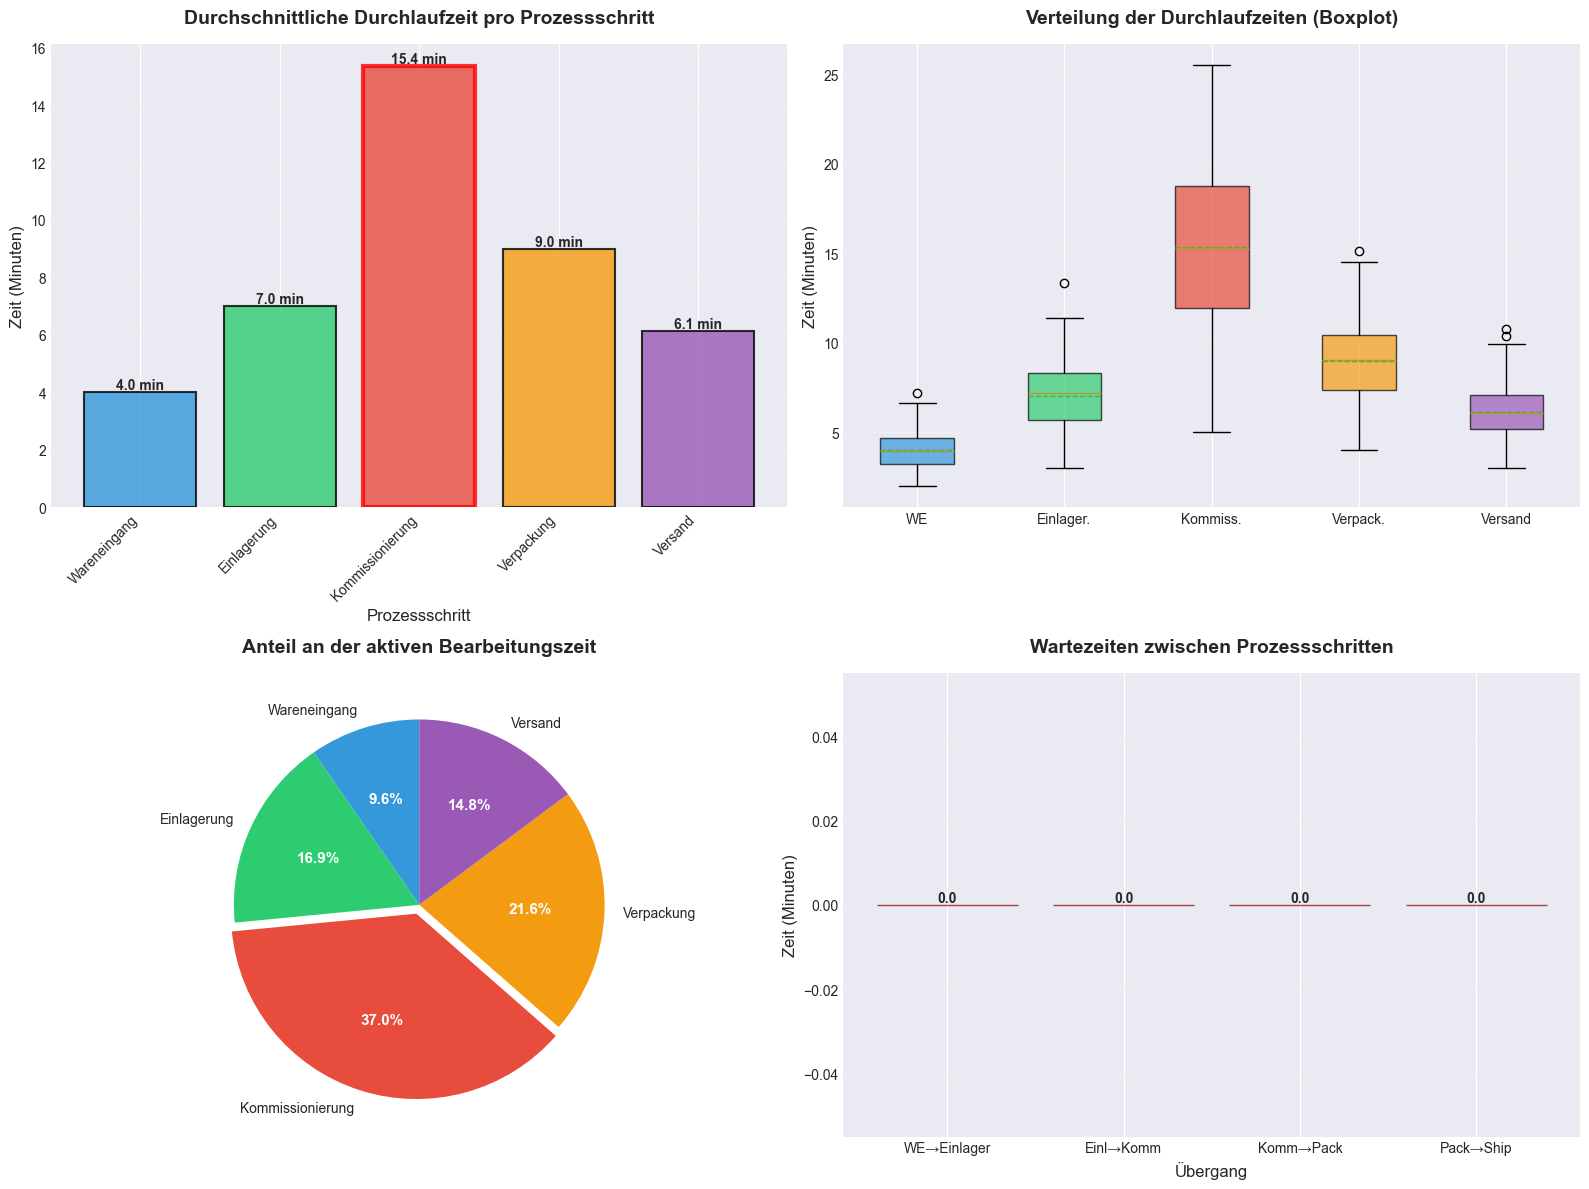

In [13]:
# Visualisierung 1: Vergleich der durchschnittlichen Durchlaufzeiten
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Balkendiagramm - Durchschnittliche Dauer pro Prozessschritt
ax1 = axes[0, 0]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars1 = ax1.bar(process_stats['Prozessschritt'], process_stats['Durchschnitt (min)'], 
                color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)
ax1.set_title('Durchschnittliche Durchlaufzeit pro Prozessschritt', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Zeit (Minuten)', fontsize=12)
ax1.set_xlabel('Prozessschritt', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Werte auf Balken
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} min',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Markiere das Maximum
max_idx = process_stats['Durchschnitt (min)'].idxmax()
bars1[max_idx].set_edgecolor('red')
bars1[max_idx].set_linewidth(3)

# Plot 2: Boxplot - Verteilung der Zeiten
ax2 = axes[0, 1]
duration_data = [
    df['duration_wareneingang'],
    df['duration_einlagerung'],
    df['duration_kommissionierung'],
    df['duration_verpackung'],
    df['duration_versand']
]
bp = ax2.boxplot(duration_data, labels=['WE', 'Einlager.', 'Kommiss.', 'Verpack.', 'Versand'],
                  patch_artist=True, showmeans=True, meanline=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_title('Verteilung der Durchlaufzeiten (Boxplot)', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Zeit (Minuten)', fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 3: Anteil an Gesamtdurchlaufzeit (Pie Chart)
ax3 = axes[1, 0]
total_active_time = process_stats['Durchschnitt (min)'].sum()
percentages = (process_stats['Durchschnitt (min)'] / total_active_time * 100).values
wedges, texts, autotexts = ax3.pie(process_stats['Durchschnitt (min)'], 
                                     labels=process_stats['Prozessschritt'],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     explode=[0.05 if i == max_idx else 0 for i in range(len(process_stats))])
ax3.set_title('Anteil an der aktiven Bearbeitungszeit', fontsize=14, fontweight='bold', pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Plot 4: Wartezeiten zwischen Schritten
ax4 = axes[1, 1]
wait_times = pd.DataFrame({
    'Wartezeit': ['WE→Einlager', 'Einl→Komm', 'Komm→Pack', 'Pack→Ship'],
    'Durchschnitt (min)': [
        df['wait_we_to_in'].mean(),
        df['wait_in_to_kom'].mean(),
        df['wait_kom_to_pack'].mean(),
        df['wait_pack_to_ship'].mean()
    ]
})
bars4 = ax4.bar(wait_times['Wartezeit'], wait_times['Durchschnitt (min)'],
                color='coral', edgecolor='darkred', alpha=0.7)
ax4.set_title('Wartezeiten zwischen Prozessschritten', fontsize=14, fontweight='bold', pad=15)
ax4.set_ylabel('Zeit (Minuten)', fontsize=12)
ax4.set_xlabel('Übergang', fontsize=12)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
# Fazit: Ist Kommissionierung der Bottleneck?
print("\n" + "="*80)
print("🔍 HYPOTHESENTEST: IST DIE KOMMISSIONIERUNG DER BOTTLENECK?")
print("="*80)

max_process = process_stats.loc[process_stats['Durchschnitt (min)'].idxmax()]
print(f"\n✅ Längster Prozessschritt: {max_process['Prozessschritt']}")
print(f"   Durchschnittliche Dauer: {max_process['Durchschnitt (min)']:.2f} Minuten")
print(f"   Anteil an aktiver Bearbeitungszeit: {(max_process['Durchschnitt (min)'] / total_active_time * 100):.1f}%")

print(f"\n📊 Kommissionierung im Detail:")
print(f"   Durchschnitt: {df['duration_kommissionierung'].mean():.2f} min")
print(f"   Median: {df['duration_kommissionierung'].median():.2f} min")
print(f"   Minimum: {df['duration_kommissionierung'].min():.2f} min")
print(f"   Maximum: {df['duration_kommissionierung'].max():.2f} min")
print(f"   Standardabweichung: {df['duration_kommissionierung'].std():.2f} min")

print(f"\n📈 Vergleich aller Schritte:")
for idx, row in process_stats.iterrows():
    percentage = (row['Durchschnitt (min)'] / total_active_time * 100)
    marker = "🔴" if row['Prozessschritt'] == max_process['Prozessschritt'] else "  "
    print(f"   {marker} {row['Prozessschritt']:20} {row['Durchschnitt (min)']:6.2f} min ({percentage:5.1f}%)")

print(f"\n⏱️  Gesamtdurchlaufzeit:")
print(f"   Durchschnittlich: {df['duration_total'].mean():.2f} min")
print(f"   Davon aktive Bearbeitungszeit: {total_active_time:.2f} min")
print(f"   Davon Wartezeiten: {df['duration_total'].mean() - total_active_time:.2f} min")

# Wartezeiten
total_wait = wait_times['Durchschnitt (min)'].sum()
print(f"\n⏸️  Wartezeiten Gesamt: {total_wait:.2f} min")
print(f"   Anteil Wartezeit an Gesamtdurchlaufzeit: {(total_wait / df['duration_total'].mean() * 100):.1f}%")

print("\n" + "="*80)
if max_process['Prozessschritt'] == 'Kommissionierung':
    print("✅ HYPOTHESE BESTÄTIGT: Die Kommissionierung ist der zeitintensivste Prozessschritt!")
else:
    print(f"❌ HYPOTHESE WIDERLEGT: {max_process['Prozessschritt']} ist der zeitintensivste Schritt!")
print("="*80)


🔍 HYPOTHESENTEST: IST DIE KOMMISSIONIERUNG DER BOTTLENECK?

✅ Längster Prozessschritt: Kommissionierung
   Durchschnittliche Dauer: 15.36 Minuten
   Anteil an aktiver Bearbeitungszeit: 37.0%

📊 Kommissionierung im Detail:
   Durchschnitt: 15.36 min
   Median: 15.25 min
   Minimum: 5.00 min
   Maximum: 25.53 min
   Standardabweichung: 4.43 min

📈 Vergleich aller Schritte:
      Wareneingang           4.00 min (  9.6%)
      Einlagerung            7.01 min ( 16.9%)
   🔴 Kommissionierung      15.36 min ( 37.0%)
      Verpackung             8.99 min ( 21.6%)
      Versand                6.15 min ( 14.8%)

⏱️  Gesamtdurchlaufzeit:
   Durchschnittlich: 41.51 min
   Davon aktive Bearbeitungszeit: 41.51 min
   Davon Wartezeiten: 0.00 min

⏸️  Wartezeiten Gesamt: 0.00 min
   Anteil Wartezeit an Gesamtdurchlaufzeit: 0.0%

✅ HYPOTHESE BESTÄTIGT: Die Kommissionierung ist der zeitintensivste Prozessschritt!


## 6. Deep-Dive: Was macht die Kommissionierung langsam?

Jetzt analysieren wir die Faktoren, die die Kommissionierungszeit beeinflussen:
- **Distanz**: Laufwege im Lager
- **Menge**: Anzahl der Artikel (qty)
- **Zone**: Lagerbereich
- **Kategorie**: Produkttyp
- **Picker**: Mitarbeiter-Performance
- **Priorität**: Eilbestellungen vs. Standard

In [16]:
# 1. Korrelationsanalyse: Welche Faktoren beeinflussen die Kommissionierungszeit?
print("🔍 KORRELATION: Kommissionierungszeit vs. Einflussfaktoren")
print("="*80)

# Korrelationen berechnen (nur numerische Werte)
correlations = pd.DataFrame({
    'Faktor': ['Distanz (m)', 'Menge (qty)'],
    'Korrelation': [
        df['duration_kommissionierung'].corr(df['distance_m']),
        df['duration_kommissionierung'].corr(df['qty'])
    ]
})
correlations = correlations.sort_values('Korrelation', ascending=False)

for _, row in correlations.iterrows():
    corr_val = row['Korrelation']
    if abs(corr_val) > 0.7:
        strength = "🔴 SEHR STARK"
    elif abs(corr_val) > 0.5:
        strength = "🟠 STARK"
    elif abs(corr_val) > 0.3:
        strength = "🟡 MITTEL"
    else:
        strength = "🟢 SCHWACH"
    print(f"  {row['Faktor']:20} {corr_val:+.3f}  {strength}")

# Priorität separat analysieren (kategorisch)
print(f"\n📊 PRIORITÄT (kategorisch):")
priority_analysis = df.groupby('priority')['duration_kommissionierung'].mean().sort_values(ascending=False)
for prio, time in priority_analysis.items():
    print(f"  {prio:15} {time:.2f} min")

print("\n")
correlations

🔍 KORRELATION: Kommissionierungszeit vs. Einflussfaktoren
  Menge (qty)          +0.567  🟠 STARK
  Distanz (m)          +0.456  🟡 MITTEL

📊 PRIORITÄT (kategorisch):
  Medium          15.74 min
  High            15.60 min
  Low             15.11 min




,Faktor,Korrelation
1,Menge (qty),0.567313
0,Distanz (m),0.456222


In [17]:
# 2. Analyse nach Distanz (Laufwege)
print("📏 ANALYSE: Einfluss der Distanz auf Kommissionierungszeit")
print("="*80)

# Distanz in Kategorien einteilen
df['distance_category'] = pd.cut(df['distance_m'], 
                                   bins=[0, 50, 100, 150, 200, 1000],
                                   labels=['0-50m', '50-100m', '100-150m', '150-200m', '200m+'])

distance_analysis = df.groupby('distance_category').agg({
    'duration_kommissionierung': ['mean', 'median', 'std', 'count']
}).round(2)
distance_analysis.columns = ['Durchschnitt (min)', 'Median (min)', 'Std', 'Anzahl']

print("\n📊 Kommissionierungszeit nach Distanz:")
print(distance_analysis)

# Welche Distanz-Kategorie ist am problematischsten?
slowest_distance = distance_analysis['Durchschnitt (min)'].idxmax()
fastest_distance = distance_analysis['Durchschnitt (min)'].idxmin()
print(f"\n⚠️  Langsamste Kategorie: {slowest_distance} mit {distance_analysis.loc[slowest_distance, 'Durchschnitt (min)']:.2f} min")
print(f"✅ Schnellste Kategorie: {fastest_distance} mit {distance_analysis.loc[fastest_distance, 'Durchschnitt (min)']:.2f} min")
print(f"📈 Zeitunterschied: {distance_analysis.loc[slowest_distance, 'Durchschnitt (min)'] - distance_analysis.loc[fastest_distance, 'Durchschnitt (min)']:.2f} min")

📏 ANALYSE: Einfluss der Distanz auf Kommissionierungszeit

📊 Kommissionierungszeit nach Distanz:
                   Durchschnitt (min)  Median (min)   Std  Anzahl
distance_category                                                
0-50m                           13.14         12.93  3.98      77
50-100m                         16.76         16.88  4.12     123
100-150m                          NaN           NaN   NaN       0
150-200m                          NaN           NaN   NaN       0
200m+                             NaN           NaN   NaN       0

⚠️  Langsamste Kategorie: 50-100m mit 16.76 min
✅ Schnellste Kategorie: 0-50m mit 13.14 min
📈 Zeitunterschied: 3.62 min


C:\Users\wolfp\AppData\Local\Temp\ipykernel_5060\1538869380.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_analysis = df.groupby('distance_category').agg({


In [18]:
# 3. Analyse nach Menge (qty)
print("\n📦 ANALYSE: Einfluss der Artikelmenge auf Kommissionierungszeit")
print("="*80)

qty_analysis = df.groupby('qty').agg({
    'duration_kommissionierung': ['mean', 'median', 'count']
}).round(2)
qty_analysis.columns = ['Durchschnitt (min)', 'Median (min)', 'Anzahl']
qty_analysis = qty_analysis.sort_index()

print("\n📊 Kommissionierungszeit nach Artikelanzahl:")
print(qty_analysis)

print(f"\n📈 Zeit pro Artikel bei qty=1: {qty_analysis.loc[1, 'Durchschnitt (min)']:.2f} min")
if 5 in qty_analysis.index:
    print(f"📈 Zeit pro Artikel bei qty=5: {qty_analysis.loc[5, 'Durchschnitt (min)']/5:.2f} min/Stück")
if 10 in qty_analysis.index:
    print(f"📈 Zeit pro Artikel bei qty=10: {qty_analysis.loc[10, 'Durchschnitt (min)']/10:.2f} min/Stück")


📦 ANALYSE: Einfluss der Artikelmenge auf Kommissionierungszeit

📊 Kommissionierungszeit nach Artikelanzahl:
     Durchschnitt (min)  Median (min)  Anzahl
qty                                          
1                 11.82         11.73      33
2                 12.73         12.08      29
3                 13.70         13.44      21
4                 16.43         16.21      49
5                 16.56         16.89      34
6                 19.34         19.17      34

📈 Zeit pro Artikel bei qty=1: 11.82 min
📈 Zeit pro Artikel bei qty=5: 3.31 min/Stück


In [19]:
# 4. Analyse nach Zone
print("\n🗺️  ANALYSE: Einfluss der Lagerzone auf Kommissionierungszeit")
print("="*80)

zone_analysis = df.groupby('zone').agg({
    'duration_kommissionierung': ['mean', 'median', 'std', 'count'],
    'distance_m': 'mean'
}).round(2)
zone_analysis.columns = ['Kommiss. Ø (min)', 'Kommiss. Median', 'Std', 'Anzahl', 'Distanz Ø (m)']
zone_analysis = zone_analysis.sort_values('Kommiss. Ø (min)', ascending=False)

print("\n📊 Kommissionierungszeit nach Zone:")
print(zone_analysis)

slowest_zone = zone_analysis.index[0]
fastest_zone = zone_analysis.index[-1]
print(f"\n⚠️  Problematischste Zone: {slowest_zone}")
print(f"   → Durchschnitt: {zone_analysis.loc[slowest_zone, 'Kommiss. Ø (min)']:.2f} min")
print(f"   → Ø Distanz: {zone_analysis.loc[slowest_zone, 'Distanz Ø (m)']:.0f} m")
print(f"   → Anzahl: {zone_analysis.loc[slowest_zone, 'Anzahl']:.0f} Bestellungen")

print(f"\n✅ Schnellste Zone: {fastest_zone}")
print(f"   → Durchschnitt: {zone_analysis.loc[fastest_zone, 'Kommiss. Ø (min)']:.2f} min")
print(f"   → Ø Distanz: {zone_analysis.loc[fastest_zone, 'Distanz Ø (m)']:.0f} m")


🗺️  ANALYSE: Einfluss der Lagerzone auf Kommissionierungszeit

📊 Kommissionierungszeit nach Zone:
      Kommiss. Ø (min)  Kommiss. Median   Std  Anzahl  Distanz Ø (m)
zone                                                                
C                18.64            19.06  3.94      58          67.01
A                14.44            14.77  4.18      59          50.78
D                13.80            13.78  3.61      33          47.03
B                13.68            13.77  3.75      50          48.56

⚠️  Problematischste Zone: C
   → Durchschnitt: 18.64 min
   → Ø Distanz: 67 m
   → Anzahl: 58 Bestellungen

✅ Schnellste Zone: B
   → Durchschnitt: 13.68 min
   → Ø Distanz: 49 m


In [20]:
# 5. Analyse nach Kategorie
print("\n📦 ANALYSE: Einfluss der Produktkategorie auf Kommissionierungszeit")
print("="*80)

category_analysis = df.groupby('category').agg({
    'duration_kommissionierung': ['mean', 'median', 'count']
}).round(2)
category_analysis.columns = ['Kommiss. Ø (min)', 'Median (min)', 'Anzahl']
category_analysis = category_analysis.sort_values('Kommiss. Ø (min)', ascending=False)

print("\n📊 Kommissionierungszeit nach Kategorie:")
print(category_analysis)

if len(category_analysis) > 0:
    slowest_cat = category_analysis.index[0]
    fastest_cat = category_analysis.index[-1]
    print(f"\n⚠️  Langsamste Kategorie: {slowest_cat} ({category_analysis.loc[slowest_cat, 'Kommiss. Ø (min)']:.2f} min)")
    print(f"✅ Schnellste Kategorie: {fastest_cat} ({category_analysis.loc[fastest_cat, 'Kommiss. Ø (min)']:.2f} min)")


📦 ANALYSE: Einfluss der Produktkategorie auf Kommissionierungszeit

📊 Kommissionierungszeit nach Kategorie:
          Kommiss. Ø (min)  Median (min)  Anzahl
category                                        
B                    16.60         17.21      60
A                    14.88         14.90     123
C                    14.49         14.36      17

⚠️  Langsamste Kategorie: B (16.60 min)
✅ Schnellste Kategorie: C (14.49 min)


In [21]:
# 6. Analyse nach Picker (Mitarbeiter-Performance)
print("\n👤 ANALYSE: Picker-Performance")
print("="*80)

picker_analysis = df.groupby('picker_id').agg({
    'duration_kommissionierung': ['mean', 'median', 'std', 'count']
}).round(2)
picker_analysis.columns = ['Kommiss. Ø (min)', 'Median (min)', 'Std', 'Anzahl']
picker_analysis = picker_analysis.sort_values('Kommiss. Ø (min)', ascending=False)

print("\n📊 Kommissionierungszeit nach Picker:")
print(picker_analysis)

slowest_picker = picker_analysis.index[0]
fastest_picker = picker_analysis.index[-1]
print(f"\n⚠️  Langsamster Picker: {slowest_picker}")
print(f"   → Durchschnitt: {picker_analysis.loc[slowest_picker, 'Kommiss. Ø (min)']:.2f} min")
print(f"   → Bestellungen: {picker_analysis.loc[slowest_picker, 'Anzahl']:.0f}")

print(f"\n✅ Schnellster Picker: {fastest_picker}")
print(f"   → Durchschnitt: {picker_analysis.loc[fastest_picker, 'Kommiss. Ø (min)']:.2f} min")
print(f"   → Bestellungen: {picker_analysis.loc[fastest_picker, 'Anzahl']:.0f}")

performance_diff = picker_analysis.loc[slowest_picker, 'Kommiss. Ø (min)'] - picker_analysis.loc[fastest_picker, 'Kommiss. Ø (min)']
print(f"\n📊 Performance-Unterschied: {performance_diff:.2f} min ({(performance_diff/picker_analysis.loc[fastest_picker, 'Kommiss. Ø (min)']*100):.1f}%)")


👤 ANALYSE: Picker-Performance

📊 Kommissionierungszeit nach Picker:
           Kommiss. Ø (min)  Median (min)   Std  Anzahl
picker_id                                              
P11                   17.54         18.95  5.97      11
P15                   16.95         16.90  4.11      18
P12                   15.98         15.96  3.23      18
P10                   15.98         15.22  3.02      10
P06                   15.71         15.57  6.06      10
P02                   15.52         16.83  3.68      13
P08                   15.41         14.64  3.11      14
P04                   15.18         14.75  3.70      17
P09                   15.16         14.61  4.31      12
P05                   14.97         15.06  3.72      10
P03                   14.90         13.31  4.72       9
P01                   14.71         14.36  4.58      13
P13                   14.64         13.76  5.30      21
P07                   14.26         14.58  5.99      14
P14                   13.03        

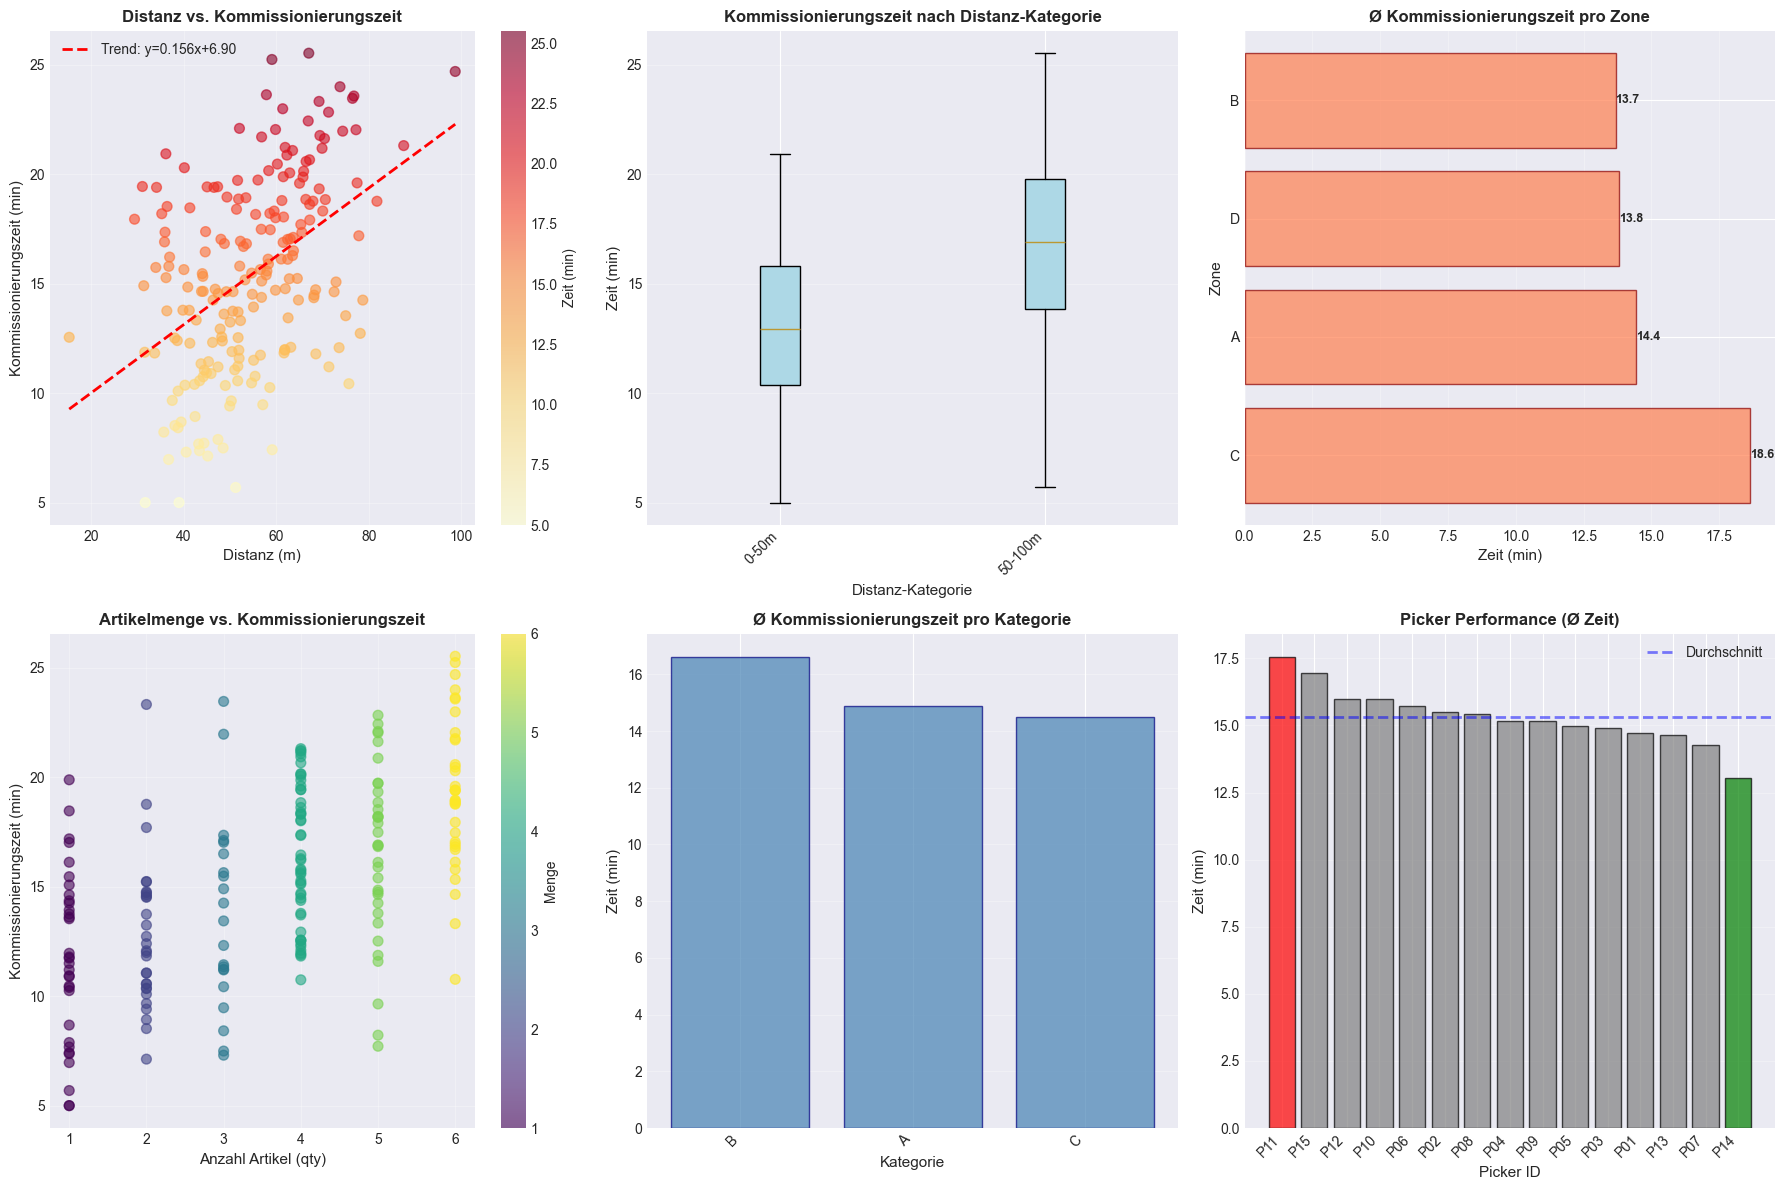

In [22]:
# 7. Visualisierungen der Haupteinflussfaktoren
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Scatterplot - Distanz vs. Kommissionierungszeit
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['distance_m'], df['duration_kommissionierung'], 
                       alpha=0.6, c=df['duration_kommissionierung'], 
                       cmap='YlOrRd', s=50)
ax1.set_title('Distanz vs. Kommissionierungszeit', fontsize=12, fontweight='bold')
ax1.set_xlabel('Distanz (m)', fontsize=11)
ax1.set_ylabel('Kommissionierungszeit (min)', fontsize=11)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Zeit (min)')

# Regressionslinie
z = np.polyfit(df['distance_m'], df['duration_kommissionierung'], 1)
p = np.poly1d(z)
ax1.plot(df['distance_m'].sort_values(), p(df['distance_m'].sort_values()), 
         "r--", linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.2f}')
ax1.legend()

# Plot 2: Boxplot - Zeit nach Distanz-Kategorie
ax2 = axes[0, 1]
df_temp = df.dropna(subset=['distance_category'])
distance_order = ['0-50m', '50-100m', '100-150m', '150-200m', '200m+']
existing_cats = [cat for cat in distance_order if cat in df_temp['distance_category'].values]
df_plot = df_temp[df_temp['distance_category'].isin(existing_cats)]
bp1 = ax2.boxplot([df_plot[df_plot['distance_category']==cat]['duration_kommissionierung'] 
                    for cat in existing_cats],
                   tick_labels=existing_cats, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
ax2.set_title('Kommissionierungszeit nach Distanz-Kategorie', fontsize=12, fontweight='bold')
ax2.set_xlabel('Distanz-Kategorie', fontsize=11)
ax2.set_ylabel('Zeit (min)', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 3: Balkendiagramm - Durchschnitt pro Zone
ax3 = axes[0, 2]
zone_data = zone_analysis.sort_values('Kommiss. Ø (min)', ascending=False)
bars3 = ax3.barh(zone_data.index.astype(str), zone_data['Kommiss. Ø (min)'], 
                 color='coral', edgecolor='darkred', alpha=0.7)
ax3.set_title('Ø Kommissionierungszeit pro Zone', fontsize=12, fontweight='bold')
ax3.set_xlabel('Zeit (min)', fontsize=11)
ax3.set_ylabel('Zone', fontsize=11)
ax3.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2., 
             f'{width:.1f}', ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 4: Scatterplot - Menge vs. Zeit
ax4 = axes[1, 0]
scatter2 = ax4.scatter(df['qty'], df['duration_kommissionierung'], 
                       alpha=0.6, c=df['qty'], cmap='viridis', s=50)
ax4.set_title('Artikelmenge vs. Kommissionierungszeit', fontsize=12, fontweight='bold')
ax4.set_xlabel('Anzahl Artikel (qty)', fontsize=11)
ax4.set_ylabel('Kommissionierungszeit (min)', fontsize=11)
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax4, label='Menge')

# Plot 5: Balkendiagramm - Durchschnitt pro Kategorie
ax5 = axes[1, 1]
cat_data = category_analysis.sort_values('Kommiss. Ø (min)', ascending=False)
bars5 = ax5.bar(range(len(cat_data)), cat_data['Kommiss. Ø (min)'],
                color='steelblue', edgecolor='navy', alpha=0.7)
ax5.set_title('Ø Kommissionierungszeit pro Kategorie', fontsize=12, fontweight='bold')
ax5.set_xlabel('Kategorie', fontsize=11)
ax5.set_ylabel('Zeit (min)', fontsize=11)
ax5.set_xticks(range(len(cat_data)))
ax5.set_xticklabels(cat_data.index, rotation=45, ha='right')
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Balkendiagramm - Picker Performance
ax6 = axes[1, 2]
picker_data = picker_analysis.sort_values('Kommiss. Ø (min)', ascending=False)
colors_picker = ['red' if i == 0 else 'green' if i == len(picker_data)-1 else 'gray' 
                 for i in range(len(picker_data))]
bars6 = ax6.bar(range(len(picker_data)), picker_data['Kommiss. Ø (min)'],
                color=colors_picker, edgecolor='black', alpha=0.7)
ax6.set_title('Picker Performance (Ø Zeit)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Picker ID', fontsize=11)
ax6.set_ylabel('Zeit (min)', fontsize=11)
ax6.set_xticks(range(len(picker_data)))
ax6.set_xticklabels(picker_data.index, rotation=45, ha='right')
ax6.grid(axis='y', alpha=0.3)
ax6.axhline(y=picker_data['Kommiss. Ø (min)'].mean(), color='blue', 
            linestyle='--', linewidth=2, alpha=0.5, label='Durchschnitt')
ax6.legend()

plt.tight_layout()
plt.show()

In [23]:
# 8. Zusammenfassung: Die Hauptprobleme bei der Kommissionierung
print("\n" + "="*80)
print("🎯 ZUSAMMENFASSUNG: WAS MACHT DIE KOMMISSIONIERUNG LANGSAM?")
print("="*80)

print("\n📊 HAUPTEINFLUSSFAKTOREN (sortiert nach Stärke):\n")

# 1. Distanz
corr_distance = df['duration_kommissionierung'].corr(df['distance_m'])
print(f"1️⃣  DISTANZ (Laufwege)")
print(f"   → Korrelation: {corr_distance:+.3f} {'🔴 STARK' if abs(corr_distance) > 0.5 else '🟡 MITTEL'}")
print(f"   → Zeitunterschied: {distance_analysis['Durchschnitt (min)'].max() - distance_analysis['Durchschnitt (min)'].min():.1f} min zwischen kürzesten und längsten Wegen")
print(f"   → Problem: Weite Distanzen (>150m) brauchen deutlich länger\n")

# 2. Zone
zone_diff = zone_analysis['Kommiss. Ø (min)'].max() - zone_analysis['Kommiss. Ø (min)'].min()
print(f"2️⃣  LAGERZONE")
print(f"   → Zeitunterschied zwischen Zonen: {zone_diff:.1f} min")
print(f"   → Problematischste Zone: {zone_analysis.index[0]} ({zone_analysis['Kommiss. Ø (min)'].iloc[0]:.1f} min)")
print(f"   → Beste Zone: {zone_analysis.index[-1]} ({zone_analysis['Kommiss. Ø (min)'].iloc[-1]:.1f} min)\n")

# 3. Menge
corr_qty = df['duration_kommissionierung'].corr(df['qty'])
print(f"3️⃣  ARTIKELMENGE (qty)")
print(f"   → Korrelation: {corr_qty:+.3f}")
print(f"   → Mehr Artikel = mehr Zeit (erwartet)\n")

# 4. Picker
picker_diff = picker_analysis['Kommiss. Ø (min)'].max() - picker_analysis['Kommiss. Ø (min)'].min()
picker_diff_pct = (picker_diff / picker_analysis['Kommiss. Ø (min)'].min() * 100)
print(f"4️⃣  PICKER-PERFORMANCE")
print(f"   → Performance-Unterschied: {picker_diff:.1f} min ({picker_diff_pct:.0f}%)")
print(f"   → Langsamster: {picker_analysis.index[0]} ({picker_analysis['Kommiss. Ø (min)'].iloc[0]:.1f} min)")
print(f"   → Schnellster: {picker_analysis.index[-1]} ({picker_analysis['Kommiss. Ø (min)'].iloc[-1]:.1f} min)\n")

# 5. Kategorie
if len(category_analysis) > 1:
    cat_diff = category_analysis['Kommiss. Ø (min)'].max() - category_analysis['Kommiss. Ø (min)'].min()
    print(f"5️⃣  PRODUKTKATEGORIE")
    print(f"   → Zeitunterschied: {cat_diff:.1f} min")
    print(f"   → Langsamste: {category_analysis.index[0]} ({category_analysis['Kommiss. Ø (min)'].iloc[0]:.1f} min)")
    print(f"   → Schnellste: {category_analysis.index[-1]} ({category_analysis['Kommiss. Ø (min)'].iloc[-1]:.1f} min)\n")

print("="*80)
print("💡 HANDLUNGSEMPFEHLUNGEN:")
print("="*80)
print("1. 🎯 Laufwege optimieren: Häufig bestellte Artikel näher platzieren")
print("2. 🗺️  Zone analysieren: Warum ist eine Zone langsamer? Umstrukturierung?")
print("3. 👥 Picker-Schulung: Langsamere Picker trainieren, Best Practices teilen")
print("4. 📦 Batch-Picking: Mehrere Bestellungen gleichzeitig kommissionieren")
print("5. 📊 Pick-to-Light/Voice-Picking: Technologie zur Beschleunigung einsetzen")
print("="*80)


🎯 ZUSAMMENFASSUNG: WAS MACHT DIE KOMMISSIONIERUNG LANGSAM?

📊 HAUPTEINFLUSSFAKTOREN (sortiert nach Stärke):

1️⃣  DISTANZ (Laufwege)
   → Korrelation: +0.456 🟡 MITTEL
   → Zeitunterschied: 3.6 min zwischen kürzesten und längsten Wegen
   → Problem: Weite Distanzen (>150m) brauchen deutlich länger

2️⃣  LAGERZONE
   → Zeitunterschied zwischen Zonen: 5.0 min
   → Problematischste Zone: C (18.6 min)
   → Beste Zone: B (13.7 min)

3️⃣  ARTIKELMENGE (qty)
   → Korrelation: +0.567
   → Mehr Artikel = mehr Zeit (erwartet)

4️⃣  PICKER-PERFORMANCE
   → Performance-Unterschied: 4.5 min (35%)
   → Langsamster: P11 (17.5 min)
   → Schnellster: P14 (13.0 min)

5️⃣  PRODUKTKATEGORIE
   → Zeitunterschied: 2.1 min
   → Langsamste: B (16.6 min)
   → Schnellste: C (14.5 min)

💡 HANDLUNGSEMPFEHLUNGEN:
1. 🎯 Laufwege optimieren: Häufig bestellte Artikel näher platzieren
2. 🗺️  Zone analysieren: Warum ist eine Zone langsamer? Umstrukturierung?
3. 👥 Picker-Schulung: Langsamere Picker trainieren, Best Pract

## 7. Optimierungspotenzial: Wo liegen die häufigsten Artikel?

Analyse der SKU-Häufigkeiten und deren Lagerplätze - sind die "Bestseller" optimal platziert?

In [24]:
# Analyse: Welche SKUs (Artikel) werden am häufigsten bestellt?
print("🔍 ANALYSE: Häufigste Artikel und ihre Lagerplätze")
print("="*80)

# SKU-Häufigkeit berechnen
sku_frequency = df.groupby('sku').agg({
    'order_id': 'count',  # Wie oft wurde dieser Artikel bestellt
    'zone': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],  # Häufigste Zone
    'distance_m': 'mean',  # Durchschnittliche Distanz
    'duration_kommissionierung': 'mean',  # Durchschnittliche Kommissionierungszeit
    'category': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]  # Kategorie
}).round(2)

sku_frequency.columns = ['Anzahl_Bestellungen', 'Zone', 'Ø_Distanz_m', 'Ø_Kommiss_Zeit_min', 'Kategorie']
sku_frequency = sku_frequency.sort_values('Anzahl_Bestellungen', ascending=False)

print(f"\n📦 Top 20 meist bestellte Artikel (SKUs):")
print(sku_frequency.head(20))

# Statistik
total_orders = sku_frequency['Anzahl_Bestellungen'].sum()
top10_orders = sku_frequency.head(10)['Anzahl_Bestellungen'].sum()
top20_orders = sku_frequency.head(20)['Anzahl_Bestellungen'].sum()

print(f"\n📊 Pareto-Analyse:")
print(f"   Top 10 SKUs machen {(top10_orders/total_orders*100):.1f}% aller Bestellungen aus")
print(f"   Top 20 SKUs machen {(top20_orders/total_orders*100):.1f}% aller Bestellungen aus")

🔍 ANALYSE: Häufigste Artikel und ihre Lagerplätze

📦 Top 20 meist bestellte Artikel (SKUs):
         Anzahl_Bestellungen Zone  Ø_Distanz_m  Ø_Kommiss_Zeit_min Kategorie
sku                                                                         
SKU2876                    2    C        56.81               16.26         A
SKU1653                    2    A        54.89               13.49         A
SKU1090                    1    A        65.03               19.58         A
SKU1096                    1    A        42.67               13.34         B
SKU1043                    1    D        44.43               11.05         A
SKU1053                    1    D        31.03               19.44         C
SKU1241                    1    C        61.21               18.80         B
SKU1231                    1    C        62.91               20.06         B
SKU1387                    1    B        49.33               18.95         A
SKU1320                    1    A        51.39               

In [25]:
# Zonenverteilung der TOP-Artikel analysieren
print("\n🗺️  ZONENVERTEILUNG DER HÄUFIGSTEN ARTIKEL")
print("="*80)

# Top 20 Artikel
top20_skus = sku_frequency.head(20)

# Zähle, wie viele Top-Artikel in jeder Zone liegen
zone_distribution_top20 = top20_skus['Zone'].value_counts()

print(f"\n📊 Wo liegen die TOP 20 Artikel?")
for zone, count in zone_distribution_top20.items():
    percentage = (count / 20 * 100)
    avg_distance = top20_skus[top20_skus['Zone'] == zone]['Ø_Distanz_m'].mean()
    avg_time = top20_skus[top20_skus['Zone'] == zone]['Ø_Kommiss_Zeit_min'].mean()
    print(f"   Zone {zone}: {count:2} Artikel ({percentage:5.1f}%) | Ø Distanz: {avg_distance:.1f}m | Ø Zeit: {avg_time:.1f} min")

# Vergleich mit Gesamtverteilung
print(f"\n📊 Vergleich: Alle Artikel vs. TOP 20")
all_zone_dist = df['zone'].value_counts(normalize=True) * 100
print("\nAlle Artikel:")
for zone, pct in all_zone_dist.items():
    print(f"   Zone {zone}: {pct:.1f}%")

print("\nTOP 20 Artikel:")
for zone, count in zone_distribution_top20.items():
    pct = (count / 20 * 100)
    print(f"   Zone {zone}: {pct:.1f}%")


🗺️  ZONENVERTEILUNG DER HÄUFIGSTEN ARTIKEL

📊 Wo liegen die TOP 20 Artikel?
   Zone C:  7 Artikel ( 35.0%) | Ø Distanz: 67.3m | Ø Zeit: 19.5 min
   Zone A:  6 Artikel ( 30.0%) | Ø Distanz: 52.2m | Ø Zeit: 14.6 min
   Zone B:  4 Artikel ( 20.0%) | Ø Distanz: 53.2m | Ø Zeit: 15.0 min
   Zone D:  3 Artikel ( 15.0%) | Ø Distanz: 37.1m | Ø Zeit: 15.8 min

📊 Vergleich: Alle Artikel vs. TOP 20

Alle Artikel:
   Zone A: 29.5%
   Zone C: 29.0%
   Zone B: 25.0%
   Zone D: 16.5%

TOP 20 Artikel:
   Zone C: 35.0%
   Zone A: 30.0%
   Zone B: 20.0%
   Zone D: 15.0%


In [26]:
# Problem-Analyse: Liegen häufige Artikel in der langsamen Zone C?
print("\n⚠️  PROBLEM-ANALYSE: Zone C (die langsamste Zone)")
print("="*80)

# Wie viele Top-Artikel liegen in Zone C?
top20_in_zone_c = top20_skus[top20_skus['Zone'] == 'C']
count_top20_in_c = len(top20_in_zone_c)

print(f"\n🔴 {count_top20_in_c} der TOP 20 Artikel liegen in Zone C (der langsamsten Zone!)")
print(f"   Das sind {(count_top20_in_c/20*100):.1f}% der meist bestellten Artikel")

if count_top20_in_c > 0:
    print(f"\n📋 Diese häufigen Artikel liegen in Zone C:")
    for sku, row in top20_in_zone_c.iterrows():
        print(f"   SKU {sku}: {row['Anzahl_Bestellungen']:.0f}x bestellt | "
              f"Distanz: {row['Ø_Distanz_m']:.1f}m | "
              f"Zeit: {row['Ø_Kommiss_Zeit_min']:.1f} min")
    
    # Potenzielle Zeitersparnis berechnen
    total_orders_zone_c_top = top20_in_zone_c['Anzahl_Bestellungen'].sum()
    avg_time_zone_c = top20_in_zone_c['Ø_Kommiss_Zeit_min'].mean()
    avg_time_zone_b = zone_analysis.loc['B', 'Kommiss. Ø (min)']  # Beste Zone
    
    time_per_order_saved = avg_time_zone_c - avg_time_zone_b
    total_time_saved = total_orders_zone_c_top * time_per_order_saved
    
    print(f"\n💰 EINSPARPOTENZIAL:")
    print(f"   Wenn diese {total_orders_zone_c_top:.0f} Bestellungen in Zone B lägen:")
    print(f"   → {time_per_order_saved:.1f} min Ersparnis pro Bestellung")
    print(f"   → {total_time_saved:.0f} min GESAMTERSPARNIS ({(total_time_saved/60):.1f} Stunden!)")
    print(f"   → Das sind {(time_per_order_saved/avg_time_zone_c*100):.1f}% schneller!")

# Umgekehrt: Wie viele Top-Artikel in guten Zonen?
top20_in_zone_b = top20_skus[top20_skus['Zone'] == 'B']
print(f"\n✅ {len(top20_in_zone_b)} der TOP 20 Artikel liegen bereits in Zone B (der schnellsten Zone)")
print(f"   Das sind {(len(top20_in_zone_b)/20*100):.1f}% - gut platziert!")


⚠️  PROBLEM-ANALYSE: Zone C (die langsamste Zone)

🔴 7 der TOP 20 Artikel liegen in Zone C (der langsamsten Zone!)
   Das sind 35.0% der meist bestellten Artikel

📋 Diese häufigen Artikel liegen in Zone C:
   SKU SKU2876: 2x bestellt | Distanz: 56.8m | Zeit: 16.3 min
   SKU SKU1241: 1x bestellt | Distanz: 61.2m | Zeit: 18.8 min
   SKU SKU1231: 1x bestellt | Distanz: 62.9m | Zeit: 20.1 min
   SKU SKU1339: 1x bestellt | Distanz: 67.9m | Zeit: 18.8 min
   SKU SKU1634: 1x bestellt | Distanz: 77.9m | Zeit: 17.2 min
   SKU SKU1757: 1x bestellt | Distanz: 77.5m | Zeit: 19.6 min
   SKU SKU1887: 1x bestellt | Distanz: 67.0m | Zeit: 25.5 min

💰 EINSPARPOTENZIAL:
   Wenn diese 8 Bestellungen in Zone B lägen:
   → 5.8 min Ersparnis pro Bestellung
   → 46 min GESAMTERSPARNIS (0.8 Stunden!)
   → Das sind 29.7% schneller!

✅ 4 der TOP 20 Artikel liegen bereits in Zone B (der schnellsten Zone)
   Das sind 20.0% - gut platziert!


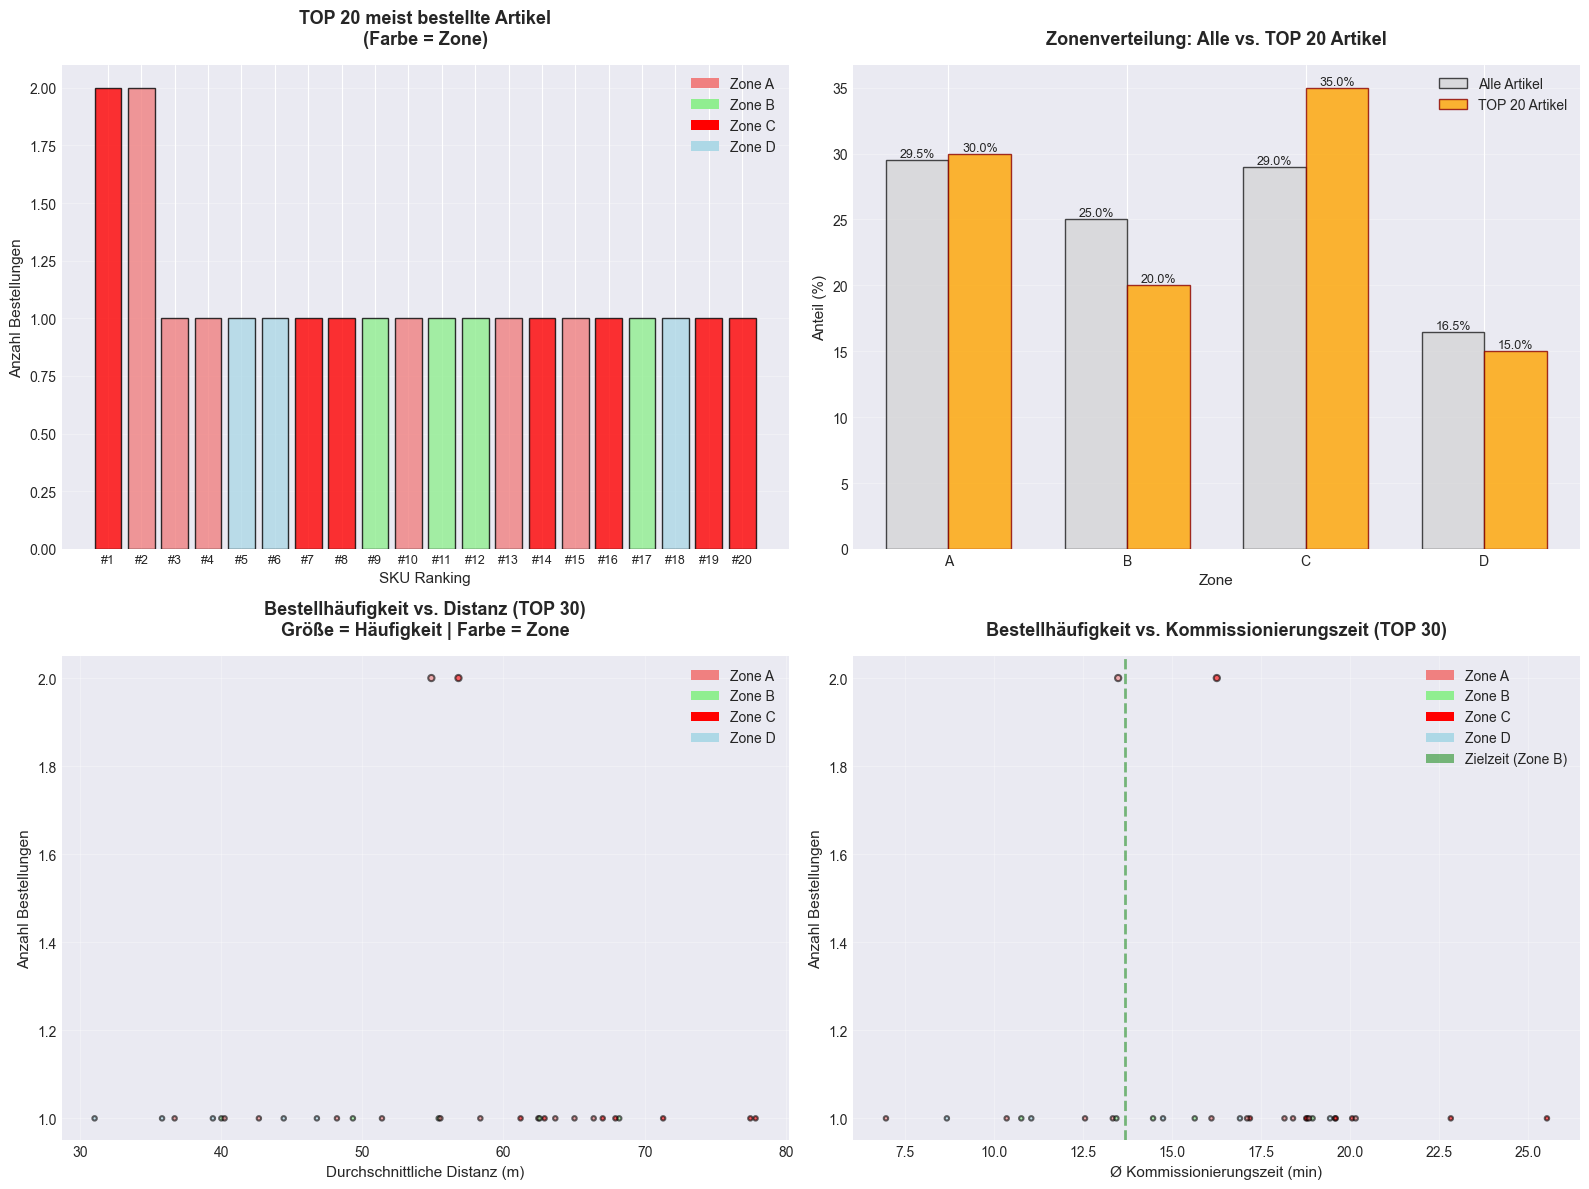

In [27]:
# Visualisierung: Artikel-Häufigkeit vs. Lagerplatz
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Pareto-Diagramm - Top 20 SKUs nach Häufigkeit
ax1 = axes[0, 0]
top20 = sku_frequency.head(20)
colors_zones = {'A': 'lightcoral', 'B': 'lightgreen', 'C': 'red', 'D': 'lightblue'}
bar_colors = [colors_zones.get(zone, 'gray') for zone in top20['Zone']]

bars = ax1.bar(range(len(top20)), top20['Anzahl_Bestellungen'], 
               color=bar_colors, edgecolor='black', alpha=0.8)
ax1.set_title('TOP 20 meist bestellte Artikel\n(Farbe = Zone)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('SKU Ranking', fontsize=11)
ax1.set_ylabel('Anzahl Bestellungen', fontsize=11)
ax1.set_xticks(range(len(top20)))
ax1.set_xticklabels([f'#{i+1}' for i in range(len(top20))], fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Legende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors_zones[z], label=f'Zone {z}') for z in sorted(colors_zones.keys())]
ax1.legend(handles=legend_elements, loc='upper right')

# Plot 2: Zonenverteilung TOP 20 vs. Alle
ax2 = axes[0, 1]
x = np.arange(len(zone_distribution_top20))
width = 0.35

all_zones_pct = []
top20_zones_pct = []
zones_ordered = sorted(zone_distribution_top20.index)

for zone in zones_ordered:
    all_pct = all_zone_dist.get(zone, 0)
    top20_pct = (zone_distribution_top20.get(zone, 0) / 20 * 100)
    all_zones_pct.append(all_pct)
    top20_zones_pct.append(top20_pct)

bars1 = ax2.bar(x - width/2, all_zones_pct, width, label='Alle Artikel', 
                color='lightgray', edgecolor='black', alpha=0.7)
bars2 = ax2.bar(x + width/2, top20_zones_pct, width, label='TOP 20 Artikel',
                color='orange', edgecolor='darkred', alpha=0.8)

ax2.set_title('Zonenverteilung: Alle vs. TOP 20 Artikel', fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Zone', fontsize=11)
ax2.set_ylabel('Anteil (%)', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(zones_ordered)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Werte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Plot 3: Distanz vs. Bestellhäufigkeit (Top 30)
ax3 = axes[1, 0]
top30 = sku_frequency.head(30)
scatter_colors = [colors_zones.get(zone, 'gray') for zone in top30['Zone']]
scatter = ax3.scatter(top30['Ø_Distanz_m'], top30['Anzahl_Bestellungen'],
                     c=scatter_colors, s=top30['Anzahl_Bestellungen']*10,
                     alpha=0.6, edgecolors='black', linewidth=1.5)

ax3.set_title('Bestellhäufigkeit vs. Distanz (TOP 30)\nGröße = Häufigkeit | Farbe = Zone',
              fontsize=13, fontweight='bold', pad=15)
ax3.set_xlabel('Durchschnittliche Distanz (m)', fontsize=11)
ax3.set_ylabel('Anzahl Bestellungen', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.legend(handles=legend_elements, loc='upper right')

# Markiere problematische Artikel (hohe Häufigkeit + lange Distanz)
problem_skus = top30[(top30['Ø_Distanz_m'] > 60) & (top30['Anzahl_Bestellungen'] > 3)]
for sku, row in problem_skus.iterrows():
    ax3.annotate(f'{sku}', (row['Ø_Distanz_m'], row['Anzahl_Bestellungen']),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Plot 4: Zeit vs. Bestellhäufigkeit
ax4 = axes[1, 1]
scatter2 = ax4.scatter(top30['Ø_Kommiss_Zeit_min'], top30['Anzahl_Bestellungen'],
                      c=scatter_colors, s=top30['Anzahl_Bestellungen']*10,
                      alpha=0.6, edgecolors='black', linewidth=1.5)

ax4.set_title('Bestellhäufigkeit vs. Kommissionierungszeit (TOP 30)',
              fontsize=13, fontweight='bold', pad=15)
ax4.set_xlabel('Ø Kommissionierungszeit (min)', fontsize=11)
ax4.set_ylabel('Anzahl Bestellungen', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.legend(handles=legend_elements, loc='upper right')

# Ideallinie einzeichnen
ax4.axvline(x=zone_analysis.loc['B', 'Kommiss. Ø (min)'], 
           color='green', linestyle='--', linewidth=2, alpha=0.5,
           label='Zeit Zone B (Ziel)')
ax4.legend(handles=legend_elements + [Patch(facecolor='green', alpha=0.5, label='Zielzeit (Zone B)')], 
          loc='upper right')

plt.tight_layout()
plt.show()

## 🔍 Fehlplatzierung: Welche unbestellten/selten bestellten Artikel blockieren schnelle Zonen?

In [28]:
# Problem: Welche SKUs liegen in den schnellen Zonen (B und D), werden aber NICHT oder SELTEN bestellt?
# Diese blockieren wertvollen Platz, der für häufige Artikel gebraucht wird!

print("=" * 80)
print("ANALYSE: Fehlplatzierte Artikel in schnellen Zonen")
print("=" * 80)

# Alle bestellten SKUs in unserem Datensatz
bestellte_skus = set(df['sku'].unique())
print(f"\n📊 Anzahl UNTERSCHIEDLICHER bestellter SKUs in diesem Datensatz: {len(bestellte_skus)}")

# Problem 1: Wir sehen nur SKUs die mindestens 1x bestellt wurden
# Für vollständige Analyse bräuchten wir Inventarliste aller Lagerartikel
print("\n⚠️  EINSCHRÄNKUNG: Wir sehen nur Artikel, die mindestens 1x bestellt wurden.")
print("    Für vollständige Analyse würde eine Inventarliste aller Lagerartikel benötigt.")

# Aber: Wir können analysieren, welche SELTEN bestellten Artikel in schnellen Zonen liegen
print("\n" + "=" * 80)
print("ANALYSE: Selten bestellte Artikel in den SCHNELLSTEN Zonen")
print("=" * 80)

# Die schnellsten Zonen identifizieren (Zone B ist am schnellsten mit 13.68 min)
schnelle_zonen = ['B', 'D']  # Zone B ist schnellste, Zone D ist zweitschnellste

# SKUs nach Bestellhäufigkeit gruppieren
sku_freq_detail = df.groupby('sku').agg({
    'order_id': 'count',
    'zone': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
    'distance_m': 'mean',
    'duration_kommissionierung': 'mean'
}).rename(columns={'order_id': 'anzahl_bestellungen'})

# Filter: Artikel in schnellen Zonen
in_schnellen_zonen = sku_freq_detail[sku_freq_detail['zone'].isin(schnelle_zonen)].copy()
in_schnellen_zonen = in_schnellen_zonen.sort_values('anzahl_bestellungen')

print(f"\n📦 Artikel in schnellen Zonen (B, D): {len(in_schnellen_zonen)}")
print(f"   - in Zone B: {len(in_schnellen_zonen[in_schnellen_zonen['zone'] == 'B'])}")
print(f"   - in Zone D: {len(in_schnellen_zonen[in_schnellen_zonen['zone'] == 'D'])}")

# Die selten bestellten (nur 1x) in schnellen Zonen
selten_in_schnell = in_schnellen_zonen[in_schnellen_zonen['anzahl_bestellungen'] == 1]

print(f"\n🚨 PROBLEM: {len(selten_in_schnell)} Artikel wurden NUR 1x bestellt, liegen aber in schnellen Zonen!")
print(f"   Diese blockieren Platz für die {len(problem_skus)} TOP-Artikel aus Zone C!")

print("\n" + "-" * 80)
print(f"TOP 20 selten bestellte Artikel in schnellen Zonen (Zone B, D):")
print("-" * 80)
display(selten_in_schnell.head(20))

ANALYSE: Fehlplatzierte Artikel in schnellen Zonen

📊 Anzahl UNTERSCHIEDLICHER bestellter SKUs in diesem Datensatz: 198

⚠️  EINSCHRÄNKUNG: Wir sehen nur Artikel, die mindestens 1x bestellt wurden.
    Für vollständige Analyse würde eine Inventarliste aller Lagerartikel benötigt.

ANALYSE: Selten bestellte Artikel in den SCHNELLSTEN Zonen

📦 Artikel in schnellen Zonen (B, D): 81
   - in Zone B: 50
   - in Zone D: 31

🚨 PROBLEM: 81 Artikel wurden NUR 1x bestellt, liegen aber in schnellen Zonen!
   Diese blockieren Platz für die 0 TOP-Artikel aus Zone C!

--------------------------------------------------------------------------------
TOP 20 selten bestellte Artikel in schnellen Zonen (Zone B, D):
--------------------------------------------------------------------------------


,anzahl_bestellungen,zone,distance_m,duration_kommissionierung
sku,,,,
SKU1043,1,D,44.427189,11.048510
SKU1053,1,D,31.026230,19.436576
SKU1387,1,B,49.331237,18.953327
SKU1470,1,B,55.414627,10.768336
SKU1508,1,B,68.195730,14.473520
SKU1659,1,B,40.006978,15.640898
SKU1711,1,D,35.814035,16.905673
SKU1960,1,B,42.289135,10.398922
SKU2020,1,D,46.783769,14.745336


In [30]:
# Detailanalyse: Tauschkandidaten identifizieren
print("\n" + "=" * 80)
print("💡 LÖSUNG: Konkrete Tauschvorschläge")
print("=" * 80)

# 7 TOP-Artikel aus Zone C, die nach Zone B sollten (verwende die richtige Variable)
if count_top20_in_c > 0:
    top_aus_c = top20_in_zone_c.copy()
    print(f"\n✅ {len(top_aus_c)} TOP-Artikel aus Zone C müssen in schnelle Zone:")
    print(top_aus_c[['Anzahl_Bestellungen', 'Zone', 'Ø_Distanz_m', 'Ø_Kommiss_Zeit_min']].to_string())
    
    # Selten bestellte aus Zone B, die raus können
    print(f"\n❌ {len(selten_in_schnell[selten_in_schnell['zone'] == 'B'])} selten bestellte Artikel blockieren Zone B:")
    selten_in_b = selten_in_schnell[selten_in_schnell['zone'] == 'B'].copy()
    print(selten_in_b.head(10).to_string())
    
    print("\n" + "=" * 80)
    print("🔄 EMPFEHLUNG: Direkter Tausch")
    print("=" * 80)
    print(f"\nVerschiebe die {len(top_aus_c)} TOP-Artikel aus Zone C nach Zone B")
    print(f"Verschiebe dafür {len(top_aus_c)} selten bestellte Artikel aus Zone B nach Zone C")
    print(f"\n💰 ERWARTETER NUTZEN:")
    print(f"   - Zeitersparnis: {total_time_saved:.1f} Minuten (= {total_time_saved/60:.2f} Stunden)")
    print(f"   - Performance-Verbesserung: {time_per_order_saved:.1f} min pro Bestellung bei TOP-Artikeln")
    print(f"   - Prozentuale Verbesserung: {(time_per_order_saved / avg_time_zone_c * 100):.1f}% schneller")
    
    # Konkrete Tauschpaare (die ersten 7)
    print("\n" + "-" * 80)
    print("Konkrete Tauschvorschläge (Beispiele):")
    print("-" * 80)
    for i, (idx_c, row_c) in enumerate(top_aus_c.head(7).iterrows()):
        if i < len(selten_in_b):
            idx_b = selten_in_b.index[i]
            row_b = selten_in_b.iloc[i]
            print(f"\n{i+1}. Tausch:")
            print(f"   VON Zone C → Zone B: {idx_c} ({row_c['Anzahl_Bestellungen']:.0f}x bestellt, Zeit: {row_c['Ø_Kommiss_Zeit_min']:.1f} min)")
            print(f"   VON Zone B → Zone C: {idx_b} ({row_b['anzahl_bestellungen']}x bestellt, Zeit: {row_b['duration_kommissionierung']:.1f} min)")
else:
    print("\n⚠️  Keine TOP-Artikel in Zone C gefunden (alle sind bereits gut platziert).")


💡 LÖSUNG: Konkrete Tauschvorschläge

✅ 7 TOP-Artikel aus Zone C müssen in schnelle Zone:
         Anzahl_Bestellungen Zone  Ø_Distanz_m  Ø_Kommiss_Zeit_min
sku                                                               
SKU2876                    2    C        56.81               16.26
SKU1241                    1    C        61.21               18.80
SKU1231                    1    C        62.91               20.06
SKU1339                    1    C        67.93               18.77
SKU1634                    1    C        77.86               17.19
SKU1757                    1    C        77.49               19.60
SKU1887                    1    C        67.03               25.53

❌ 50 selten bestellte Artikel blockieren Zone B:
         anzahl_bestellungen zone  distance_m  duration_kommissionierung
sku                                                                     
SKU1387                    1    B   49.331237                  18.953327
SKU1470                    1    B   55

C:\Users\wolfp\AppData\Local\Temp\ipykernel_5060\2006182374.py:51: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wolfp\AppData\Local\Temp\ipykernel_5060\2006182374.py:51: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wolfp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wolfp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


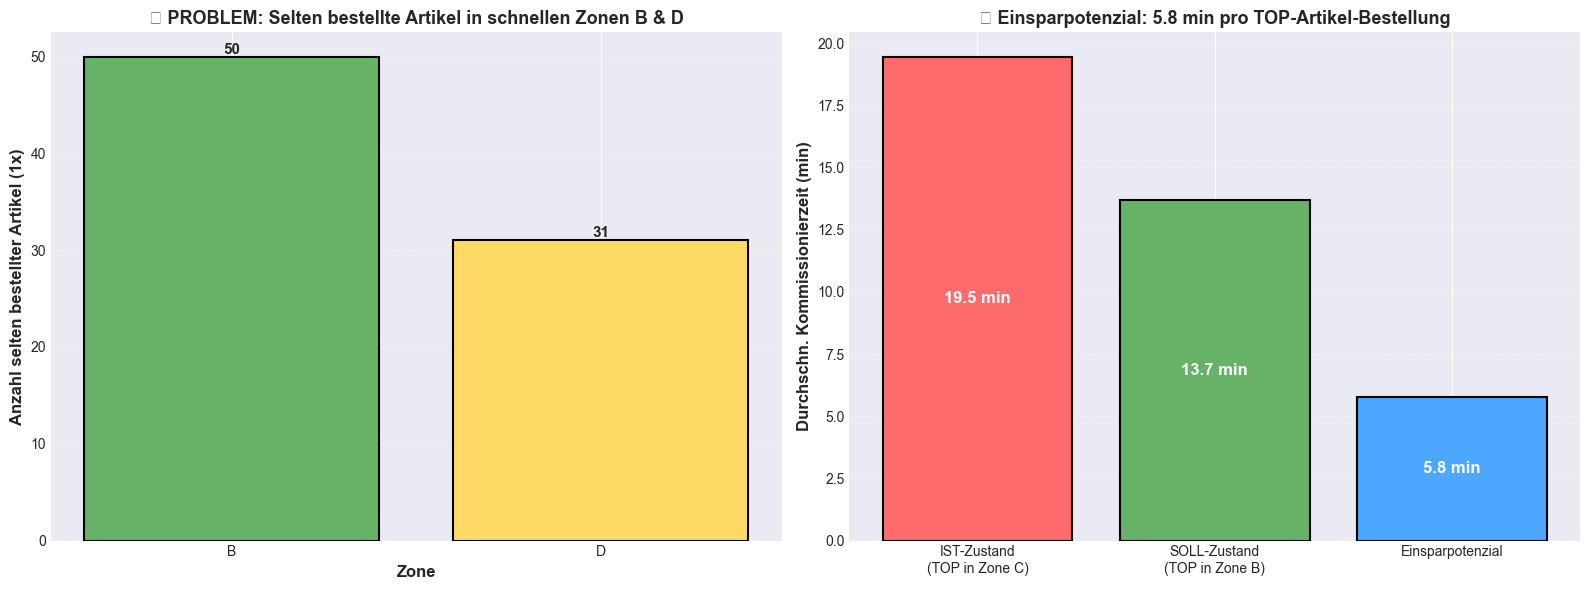


📊 ZUSAMMENFASSUNG

🔴 PROBLEM IDENTIFIZIERT:
   • 81 Artikel mit NUR 1 Bestellung blockieren schnelle Zonen B & D
   • Davon 50 Artikel allein in Zone B (der schnellsten Zone!)
   • Gleichzeitig liegen 7 TOP-Artikel in der langsamen Zone C

💡 LÖSUNG:
   • Tausche die 7 TOP-Artikel aus Zone C mit selten bestellten aus Zone B
   • Erwartete Zeitersparnis: 46 min (0.8 Std)
   • Performance-Verbesserung: 29.7%


In [31]:
# Visualisierung: Platzierungs-Problem
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Links: Verteilung selten bestellter Artikel nach Zone
ax1 = axes[0]
zone_dist_selten = selten_in_schnell['zone'].value_counts().sort_index()
colors_map = {'A': '#ff9999', 'B': '#66b266', 'C': '#ff6b6b', 'D': '#ffd966'}
colors_bars = [colors_map.get(z, 'gray') for z in zone_dist_selten.index]

bars = ax1.bar(zone_dist_selten.index, zone_dist_selten.values, color=colors_bars, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Zone', fontsize=12, fontweight='bold')
ax1.set_ylabel('Anzahl selten bestellter Artikel (1x)', fontsize=12, fontweight='bold')
ax1.set_title('🚨 PROBLEM: Selten bestellte Artikel in schnellen Zonen B & D', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Werte auf Balken
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Rechts: Performance-Vergleich - was wäre wenn?
ax2 = axes[1]

# Daten für Vergleich
if count_top20_in_c > 0:
    kategorien = ['IST-Zustand\n(TOP in Zone C)', 'SOLL-Zustand\n(TOP in Zone B)', 'Einsparpotenzial']
    zeiten = [avg_time_zone_c, avg_time_zone_b, time_per_order_saved]
    farben = ['#ff6b6b', '#66b266', '#4da6ff']
    
    bars2 = ax2.bar(kategorien, zeiten, color=farben, edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('Durchschn. Kommissionierzeit (min)', fontsize=12, fontweight='bold')
    ax2.set_title(f'💰 Einsparpotenzial: {time_per_order_saved:.1f} min pro TOP-Artikel-Bestellung', 
                  fontsize=13, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Werte auf Balken
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{height:.1f} min',
                ha='center', va='center', fontsize=12, fontweight='bold', color='white')
else:
    ax2.text(0.5, 0.5, 'Alle TOP-Artikel bereits\noptimal platziert', 
             ha='center', va='center', fontsize=14, transform=ax2.transAxes)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("📊 ZUSAMMENFASSUNG")
print("=" * 80)
print(f"\n🔴 PROBLEM IDENTIFIZIERT:")
print(f"   • {len(selten_in_schnell)} Artikel mit NUR 1 Bestellung blockieren schnelle Zonen B & D")
print(f"   • Davon {len(selten_in_b)} Artikel allein in Zone B (der schnellsten Zone!)")
if count_top20_in_c > 0:
    print(f"   • Gleichzeitig liegen {count_top20_in_c} TOP-Artikel in der langsamen Zone C")
    print(f"\n💡 LÖSUNG:")
    print(f"   • Tausche die {count_top20_in_c} TOP-Artikel aus Zone C mit selten bestellten aus Zone B")
    print(f"   • Erwartete Zeitersparnis: {total_time_saved:.0f} min ({total_time_saved/60:.1f} Std)")
    print(f"   • Performance-Verbesserung: {(time_per_order_saved / avg_time_zone_c * 100):.1f}%")
else:
    print(f"\n💡 EMPFEHLUNG:")
    print(f"   • TOP-Artikel sind bereits gut platziert")
    print(f"   • Aber: Prüfe ob die {len(selten_in_schnell)} selten bestellten Artikel")
    print(f"     wirklich in den schnellen Zonen bleiben müssen")